In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.DataFrame()

In [3]:
models = ["ALBERT", "BERT", "mDistilBERT", "Gemma", "mBERT", "Mistral", "Qwen", "RoBERTa", "XLM-RoBERTa"]
domains = ["google", "reddit"]
locales = ["au", "in", "uk"]
tasks = ["sentiment", "sarcasm"]

df = pd.DataFrame()
for domain in domains:
    for task in tasks:
        if task == "sarcasm" and domain == "google":
            continue
        for locale in locales:
            for model in models:
                size = len(pd.read_csv(f"./Dataset/Splits/{task.title()}/en-{locale.upper()}/{domain.title()}/train.csv", encoding="ascii", encoding_errors="ignore"))
                x = pd.read_csv(f"./Results/{model}/{task.title()}/en-{locale.upper()}/{domain.title()}/metric.csv")
                x["model"] = model
                x["locale"] = locale
                x["size"] = size
                x["task"] = domain+"-"+task
                df = pd.concat([df, x], axis="rows")

df = df.reset_index(drop = True)
df.to_csv("./Results/Combined.csv", index = False)
df

,precision,recall,f1_score,model,locale,size,task
0,0.944556,0.902146,0.920594,ALBERT,au,946,google-sentiment
1,0.927903,0.942551,0.934846,BERT,au,946,google-sentiment
2,0.919144,0.887626,0.901718,mDistilBERT,au,946,google-sentiment
3,0.974376,0.978535,0.976430,Gemma,au,946,google-sentiment
4,0.914773,0.914773,0.914773,mBERT,au,946,google-sentiment
...,...,...,...,...,...,...,...
76,0.785530,0.678166,0.707118,mBERT,uk,1031,reddit-sarcasm
77,0.808163,0.748539,0.771486,Mistral,uk,1031,reddit-sarcasm
78,0.799648,0.557172,0.549162,Qwen,uk,1031,reddit-sarcasm
79,0.624352,0.680517,0.591437,RoBERTa,uk,1031,reddit-sarcasm


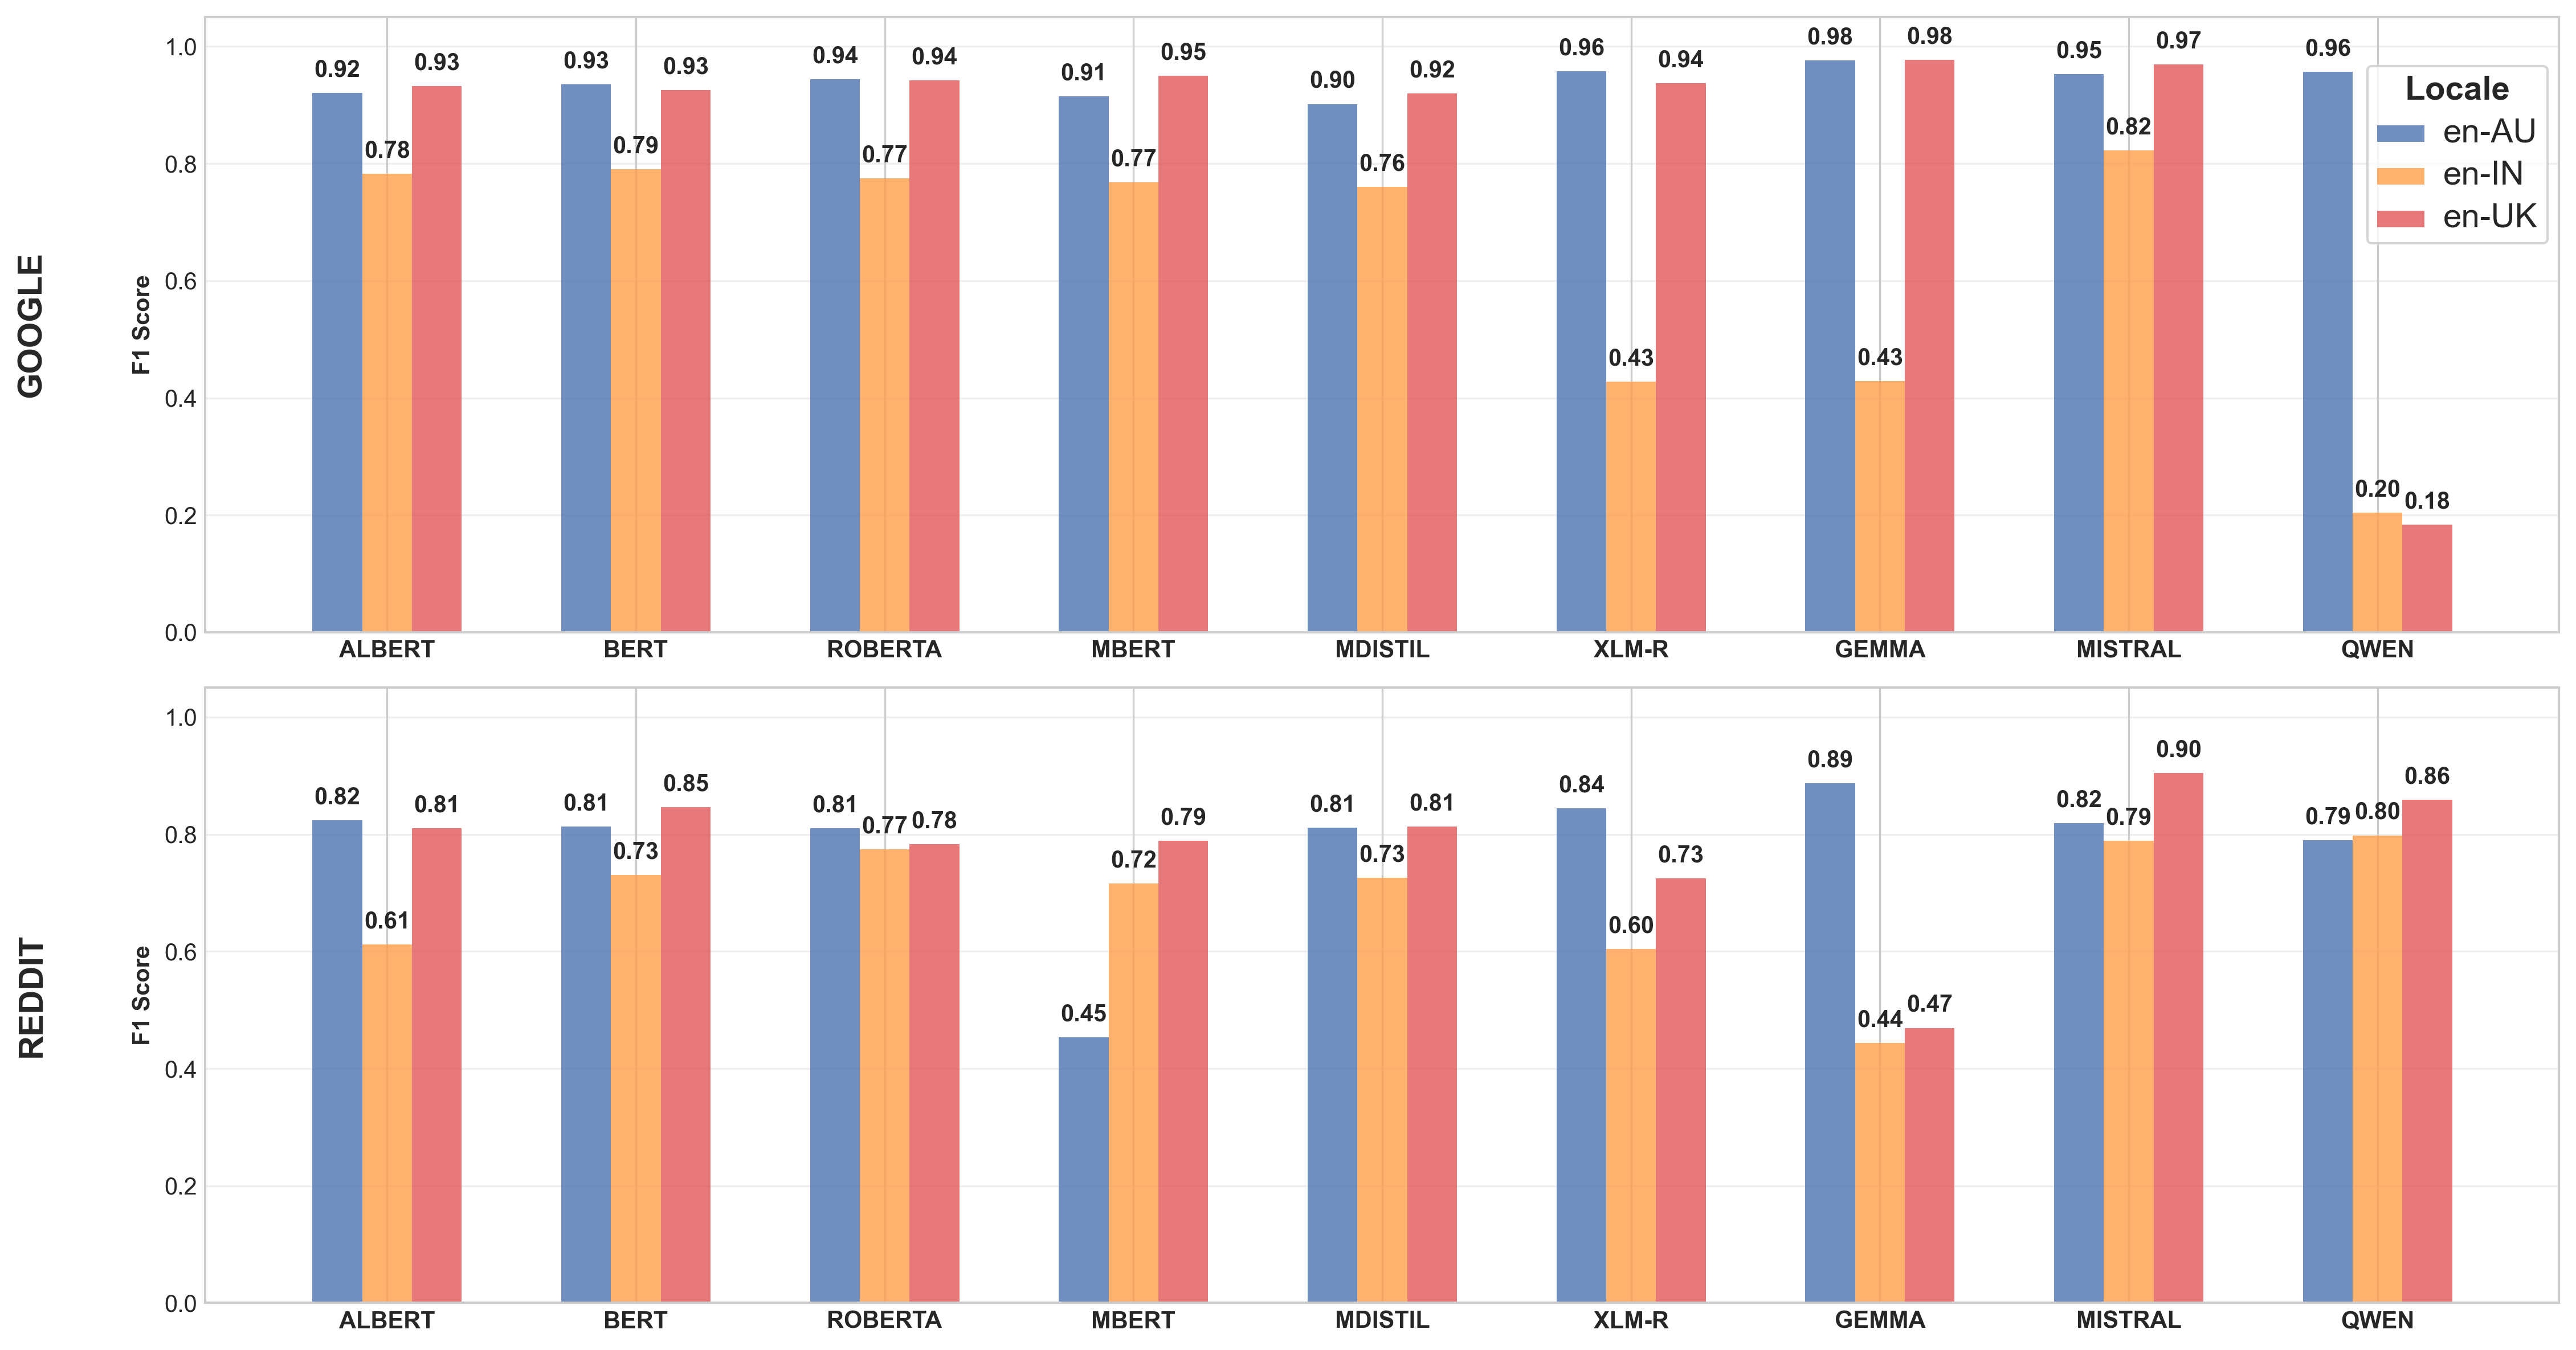

In [4]:
def add_value_labels(ax, bars, rotation=0, offset=0.02):
    """Add value labels on top of each bar"""
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.,
                height + offset,
                f'{height:.2f}',
                ha='center',
                va='bottom',
                rotation=rotation,
                fontsize=10,
                weight="bold")

# Read data
df = pd.read_csv("./Results/Combined.csv")

# Filter for sentiment tasks and rename them
df['task'] = df['task'].map({
    'google-sentiment': 'GOOGLE',
    'reddit-sentiment': 'REDDIT'
})

# Create figure with two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), height_ratios=[1, 1], dpi=300)

# Constants
bar_width = 0.2
opacity = 0.80
models = ["ALBERT", "BERT", "RoBERTa", "mBERT", "mDistilBERT", "XLM-RoBERTa", "Gemma", "Mistral", "Qwen"]
model_labels = ['ALBERT', 'BERT', 'ROBERTA', 'MBERT', 'MDISTIL', 'XLM-R', 'GEMMA', 'MISTRAL', 'QWEN']

# Colors
colors = {
    'au': '#4C72B0',  # blue
    'in': '#FF9E4A',  # orange
    'uk': '#E15759',  # red
    'avg': '#2F4F4F'  # dark slate gray for average
}

# Plot for each task
for task, ax in zip(['GOOGLE', 'REDDIT'], [ax1, ax2]):
    x = np.arange(len(models))
    
    # Calculate all averages first to find highest and lowest
    model_averages = []
    for model in models:
        avg_score = df[(df['model'] == model) & 
                      (df['task'] == task)]['f1_score'].mean()
        model_averages.append(avg_score)
    highest_average = max(model_averages)
    lowest_average = min(model_averages)
    
    # Plot bars for each locale
    for i, locale in enumerate(['au', 'in', 'uk']):
        scores = []
        for model in models:
            score = df[(df['model'] == model) & 
                      (df['locale'] == locale) & 
                      (df['task'] == task)]['f1_score'].values[0]
            scores.append(score)
        bars = ax.bar(x + i*bar_width,
               scores,
               bar_width,
               label=f'en-{locale.upper()}',
               color=colors[locale],
               alpha=opacity)
        
        add_value_labels(ax, bars)
    
    # Customize subplot
    ax.set_xticks(x + 1*bar_width)
    ax.set_xticklabels(model_labels, weight='bold')
    ax.set_ylim(0, 1.05)
    ax.grid(True, axis='y', alpha=0.3)
    ax.set_ylabel('F1 Score', weight='bold')
    
    # Add task label on the left
    ax.text(-0.08, 0.5, task,
            transform=ax.transAxes,
            rotation=90,
            verticalalignment='center',
            weight='bold',
            size=14)

# Remove xlabel from both subplots
ax1.set_xlabel('')
ax2.set_xlabel('')

# Add legend to top subplot only
legend = ax1.legend(title='Locale',
                   loc='upper right',
                   bbox_to_anchor=(1.0, 0.94),
                   frameon=True,
                   fancybox=True)
legend.get_title().set_weight('bold')
legend.get_title().set_size(14)
for text in legend.get_texts():
    text.set_size(14)

# Adjust layout
plt.tight_layout()


# Save plot
plt.savefig("./Figures/sent-all.png", 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1,
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none')

plt.show()

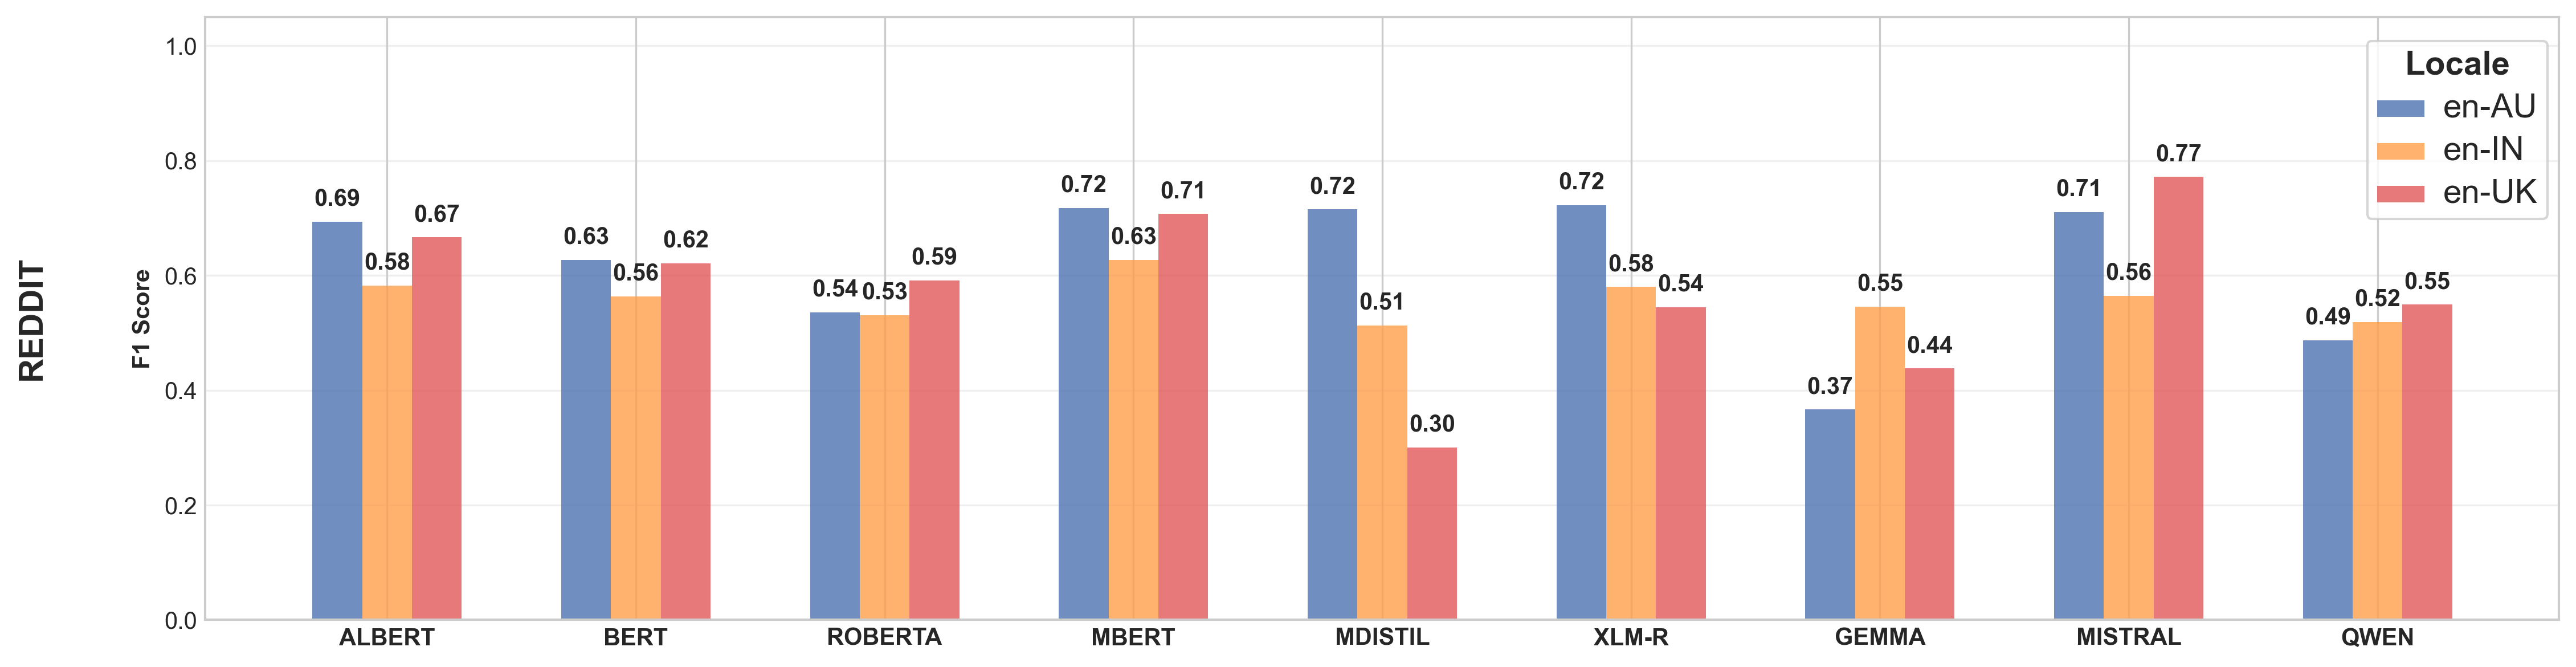

In [5]:
df = pd.read_csv("./Results/Combined.csv")

# Filter for sarcasm task and rename
df['task'] = df['task'].map({
    'reddit-sarcasm': 'REDDIT'
})

# Create figure with single subplot
fig, ax = plt.subplots(figsize=(15, 4), dpi=300)

# Constants
bar_width = 0.2
opacity = 0.80
models = ["ALBERT", "BERT", "RoBERTa", "mBERT", "mDistilBERT", "XLM-RoBERTa", "Gemma", "Mistral", "Qwen"]
model_labels = ['ALBERT', 'BERT', 'ROBERTA', 'MBERT', 'MDISTIL', 'XLM-R', 'GEMMA', 'MISTRAL', 'QWEN']

# Colors
colors = {
    'au': '#4C72B0',  # blue
    'in': '#FF9E4A',  # orange
    'uk': '#E15759',  # red
    'avg': '#2F4F4F'  # dark slate gray for average
}

x = np.arange(len(models))

# Calculate all averages first to find highest and lowest
model_averages = []
for model in models:
    avg_score = df[(df['model'] == model) & 
                   (df['task'] == 'REDDIT')]['f1_score'].mean()
    model_averages.append(avg_score)
highest_average = max(model_averages)
lowest_average = min(model_averages)

# Plot bars for each locale
for i, locale in enumerate(['au', 'in', 'uk']):
    scores = []
    for model in models:
        score = df[(df['model'] == model) & 
                   (df['locale'] == locale) & 
                   (df['task'] == 'REDDIT')]['f1_score'].values[0]
        scores.append(score)
    bars = ax.bar(x + i*bar_width,
           scores,
           bar_width,
           label=f'en-{locale.upper()}',
           color=colors[locale],
           alpha=opacity)
    add_value_labels(ax, bars)

# Customize subplot
ax.set_xticks(x + 1*bar_width)
ax.set_xticklabels(model_labels, weight='bold')
ax.set_ylim(0, 1.05)
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylabel('F1 Score', weight='bold')

# Add task label on the left
ax.text(-0.08, 0.5, 'REDDIT',
        transform=ax.transAxes,
        rotation=90,
        verticalalignment='center',
        weight='bold',
        size=14)

# Add legend
legend = ax.legend(title='Locale',
                  loc='upper right',
                  bbox_to_anchor=(1.0, 0.98),
                  frameon=True,
                  fancybox=True)
legend.get_title().set_weight('bold')
legend.get_title().set_size(14)
for text in legend.get_texts():
    text.set_size(14)

# Adjust layout
plt.tight_layout()

# Save plot
plt.savefig("./Figures/sarc-all.png", 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1,
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none')

plt.show()

/var/folders/_m/6pck5n390kx8prt9pb9qhpnh0000gn/T/ipykernel_85900/1053975376.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


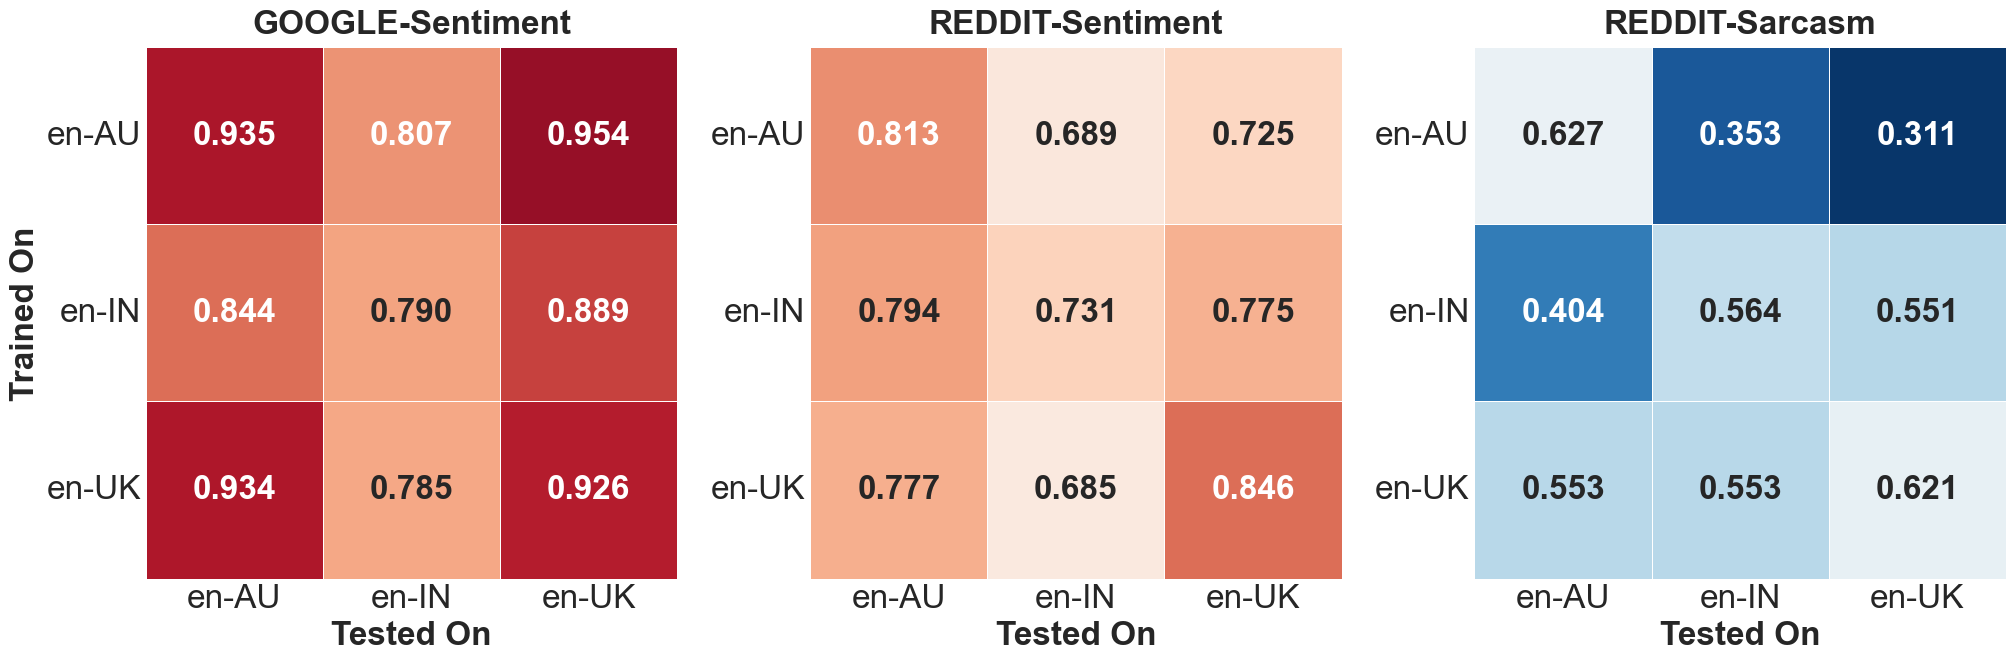

In [6]:
def create_heatmap(data, ax, title, norm):
    df = pd.DataFrame(data)
    
    # Map locale codes to desired format
    locale_mapping = {'au': 'en-AU', 'in': 'en-IN', 'uk': 'en-UK'}
    
    # Create a copy of the data with mapped values
    df_mapped = df.copy()
    df_mapped['trained'] = df_mapped['trained'].map(lambda x: 'PT' if x == 'pre' else locale_mapping.get(x, x))
    df_mapped['tested'] = df_mapped['tested'].map(lambda x: locale_mapping.get(x, x))
    
    heatmap_data = df_mapped.pivot(index='trained', columns='tested', values='f1_score')
    
    # Ensure consistent order of labels
    desired_order = ['en-AU', 'en-IN', 'en-UK']
    heatmap_data = heatmap_data.reindex(index=desired_order)
    heatmap_data = heatmap_data.reindex(columns=['en-AU', 'en-IN', 'en-UK'])
    
    sns.heatmap(heatmap_data,
                ax=ax,
                annot=True,
                fmt='.3f',
                cmap='RdBu_r',
                alpha=1,
                norm=norm,
                square=True,
                cbar=False,
                linewidth=0.5,  # Added thin lines between squares
                linecolor='white',  # Made grid lines white
                annot_kws={'weight': 'bold', 'size': 24})  # Increased font size of values
    
    ax.set_title(title, pad=10, weight='bold', size=24)  # Increased title font size
    ax.set_xlabel('Tested On', weight='bold', size=24)  # Increased label font size
    ax.set_ylabel('', weight='bold', size=24)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=24)  # Increased tick label font size
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=24)

# Read data
google_data = pd.read_csv("./Results/Cross-Variety/BERT/Sentiment/Google/metric.csv")
reddit_sent_data = pd.read_csv("./Results/Cross-Variety/BERT/Sentiment/Reddit/metric.csv")
reddit_sarc_data = pd.read_csv("./Results/Cross-Variety/BERT/Sarcasm/Reddit/metric.csv")


# Create figure with space for colorbar
fig = plt.figure(figsize=(24, 8))  # Increased figure size
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.25) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# Create color normalization for all plots
norm = plt.Normalize(vmin=0.3, vmax=1.0)
# Create heatmaps
create_heatmap(google_data, ax1, 'GOOGLE-Sentiment', norm)
create_heatmap(reddit_sent_data, ax2, 'REDDIT-Sentiment', norm)
create_heatmap(reddit_sarc_data, ax3, 'REDDIT-Sarcasm', norm)

ax1.set_ylabel('Trained On', weight='bold', size=24)


# cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='RdBu_r'),
#                    cax=cax, label='F1 Score')
# cax.tick_params(labelsize=20)  # Increased colorbar tick label size
# cbar.set_label('F1 Score', size=20, weight='bold')  # Increased colorbar label size

plt.tight_layout()
plt.savefig("./Figures/cross-bert.png",
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1,
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none')
plt.show()

/var/folders/_m/6pck5n390kx8prt9pb9qhpnh0000gn/T/ipykernel_85900/2066481196.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


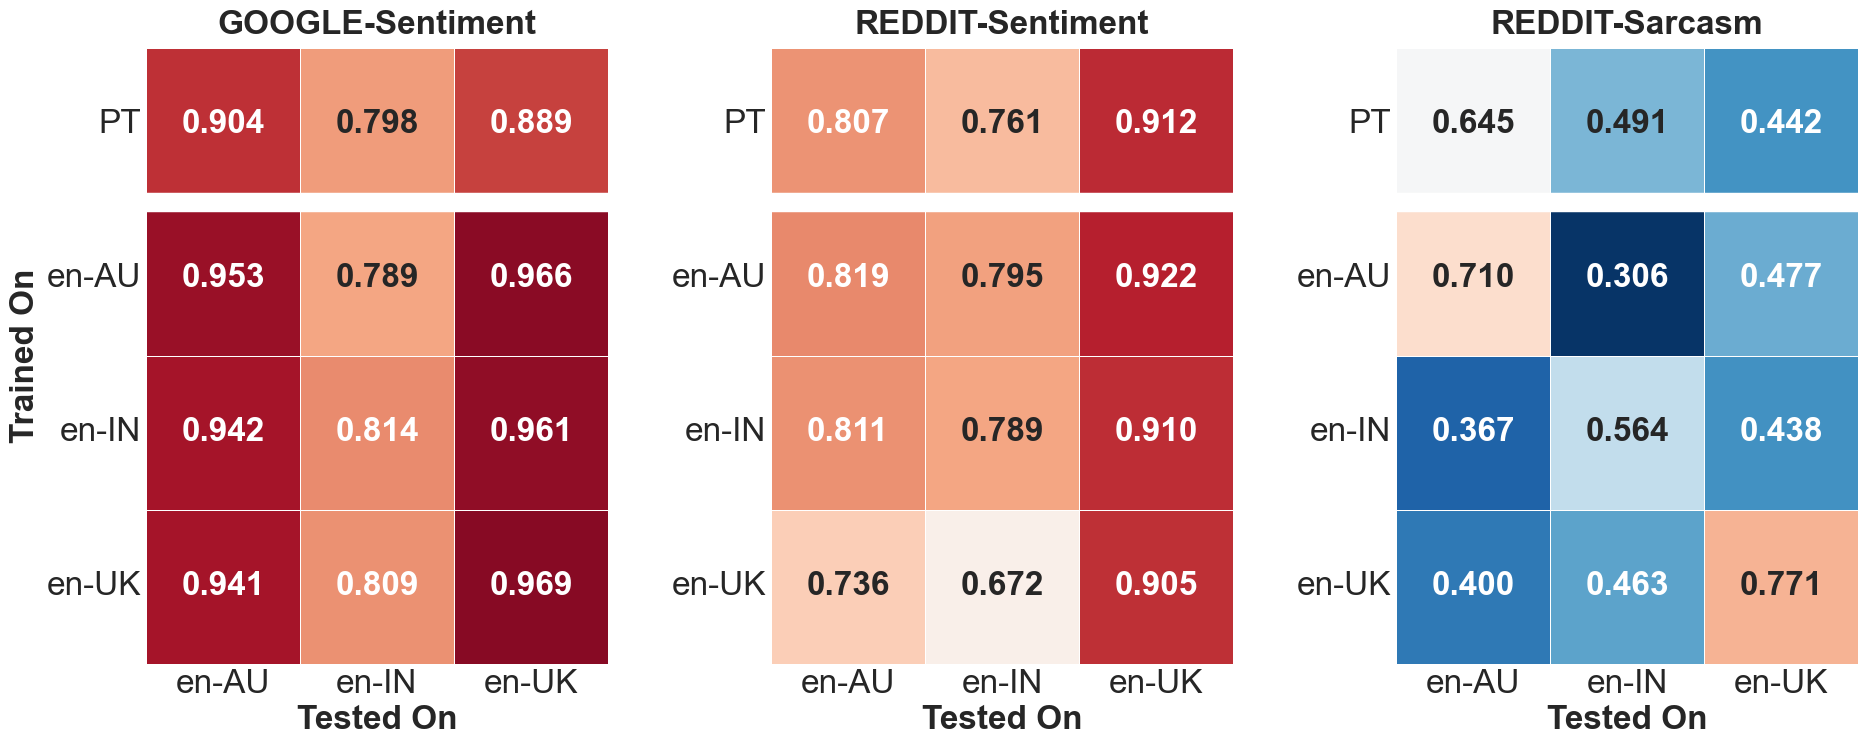

In [7]:
def create_heatmap(data, ax, title, norm):
    df = pd.DataFrame(data)
    
    # Map locale codes to desired format
    locale_mapping = {'au': 'en-AU', 'in': 'en-IN', 'uk': 'en-UK'}
    
    # Create a copy of the data with mapped values
    df_mapped = df.copy()
    df_mapped['trained'] = df_mapped['trained'].map(lambda x: 'PT' if x == 'pre' else locale_mapping.get(x, x))
    df_mapped['tested'] = df_mapped['tested'].map(lambda x: locale_mapping.get(x, x))
    
    heatmap_data = df_mapped.pivot(index='trained', columns='tested', values='f1_score')
    
    # Ensure consistent order of labels
    desired_order = ['PT', 'en-AU', 'en-IN', 'en-UK']
    heatmap_data = heatmap_data.reindex(index=desired_order)
    heatmap_data = heatmap_data.reindex(columns=['en-AU', 'en-IN', 'en-UK'])
    
    sns.heatmap(heatmap_data,
                ax=ax,
                annot=True,
                fmt='.3f',
                cmap='RdBu_r',
                alpha=1,
                norm=norm,
                square=True,
                cbar=False,
                linewidth=0.5,  # Added thin lines between squares
                linecolor='white',  # Made grid lines white
                annot_kws={'weight': 'bold', 'size': 24})  # Increased font size of values
    
    ax.axhline(y=1, color='white', linewidth=14)
    
    ax.set_title(title, pad=10, weight='bold', size=24)  # Increased title font size
    ax.set_xlabel('Tested On', weight='bold', size=24)
    ax.set_ylabel('', weight='bold', size=24)
    
    # ax.yaxis.set_label_coords(-0.4, -1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=24)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=24)

google_data = pd.read_csv("./Results/Cross-Variety/Mistral/Sentiment/Google/metric.csv")
reddit_sent_data = pd.read_csv("./Results/Cross-Variety/Mistral/Sentiment/Reddit/metric.csv")
reddit_sarc_data = pd.read_csv("./Results/Cross-Variety/Mistral/Sarcasm/Reddit/metric.csv")

results = pd.read_csv("./Results/Cross-Variety/Mistral/Pretrained/metric.csv")

results = results.loc[results["config"]=="pre"].reset_index(drop = True)[["precision", "recall", "f1_score", "config", "locale", "task"]]
results.columns = ["precision", "recall", "f1_score", "trained", "tested", "task"]
google_data = pd.concat([google_data, results[["precision", "recall", "f1_score", "trained", "tested"]].loc[results["task"] == "google-sentiment"]]).reset_index(drop=True)
reddit_sent_data = pd.concat([reddit_sent_data, results[["precision", "recall", "f1_score", "trained", "tested"]].loc[results["task"] == "reddit-sentiment"]]).reset_index(drop=True)
reddit_sarc_data = pd.concat([reddit_sarc_data, results[["precision", "recall", "f1_score", "trained", "tested"]].loc[results["task"] == "reddit-sarcasm"]]).reset_index(drop=True)

# Create figure with space for colorbar
fig = plt.figure(figsize=(24, 8))  # Increased figure size
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.025) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# Create color normalization for all plots
norm = plt.Normalize(vmin=0.3, vmax=1.0)

# Create heatmaps
create_heatmap(google_data, ax1, 'GOOGLE-Sentiment', norm)
create_heatmap(reddit_sent_data, ax2, 'REDDIT-Sentiment', norm)
create_heatmap(reddit_sarc_data, ax3, 'REDDIT-Sarcasm', norm)

ax1.set_ylabel('Trained On', weight='bold', size=24)

# Add single colorbar with larger size
# cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='RdBu_r'),
#                    cax=cax, label='F1 Score')
# cax.tick_params(labelsize=20)  # Increased colorbar tick label size
# cbar.set_label('F1 Score', size=20, weight='bold')  # Increased colorbar label size

plt.tight_layout()
plt.savefig("./Figures/cross-mistral.png",
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1,
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none')
plt.show()

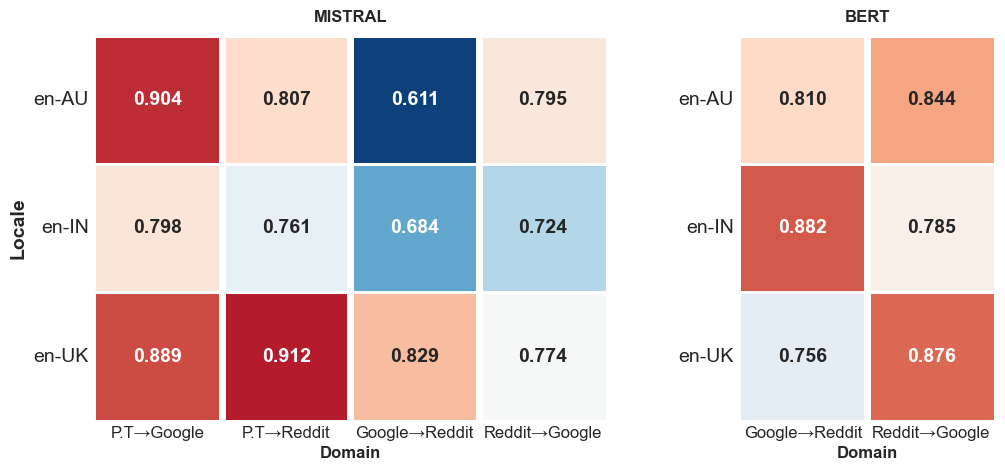

In [8]:
df_mistral = pd.read_csv("./Results/Cross-Domain/Mistral/metric.csv")
df_bert = pd.read_csv("./Results/Cross-Domain/BERT/metric.csv")

# Create figure with gridspec
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.5], wspace=0.25)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Set color normalization
norm = plt.Normalize(vmin=0.6, vmax=0.95)

def prepare_data(df, mistral):
    # Map locales to desired format
    locale_mapping = {'au': 'en-AU', 'in': 'en-IN', 'uk': 'en-UK'}
    df['locale'] = df['locale'].map(locale_mapping)
    df['domain'] = df['train-domain'] + '→' + df['test-domain']
    
    # Pivot the data
    pivoted = pd.pivot_table(
        df,
        values='f-score',
        index='locale',
        columns='domain'
    ).round(3)
    
    # Set specific order for columns
    if mistral:
        desired_order = ['P.T→Google', 'P.T→Reddit', 'Google→Reddit', 'Reddit→Google']
        pivoted = pivoted.reindex(columns=desired_order, fill_value=None)
    return pivoted

# Prepare data for both models
data_mistral = prepare_data(df_mistral, mistral=True)
data_bert = prepare_data(df_bert, mistral=False)

# Define common heatmap parameters
heatmap_params = {
    'annot': True,
    'fmt': '.3f',
    'cmap': 'RdBu_r',
    'norm': norm,
    'square': True,
    'cbar': False,
    'linewidth': 2,
    'linecolor': 'white',
    'annot_kws': {'weight': 'bold', 'size': 14}
}

# Create heatmaps
sns.heatmap(data_mistral, ax=ax1, **heatmap_params)
sns.heatmap(data_bert, ax=ax2, **heatmap_params)

# Customize plots
for ax, title in zip([ax1, ax2], ['MISTRAL', 'BERT']):
    ax.set_title(title, pad=10, weight='bold', size=12)
    ax.set_xlabel('Domain', weight='bold', size=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=14)
    
    # Add vertical white lines between columns
    for x in range(1, len(ax.get_xticklabels())):
        ax.axvline(x=x, color='white', linewidth=5)
    
    # Add horizontal white lines between rows
    for y in range(1, len(ax.get_yticklabels())):
        ax.axhline(y=y, color='white', linewidth=1)

# Set y-label only for left plot
ax1.set_ylabel('Locale', weight='bold', size=14)
ax2.set_ylabel('')

plt.savefig('./Figures/cross-domain.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()